<a href="https://colab.research.google.com/github/askewai/StackingEnsMLSND/blob/main/ML_stacking_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
plt.style.use("fivethirtyeight")

In [ ]:
data = pd.read_csv("/content/Sales_Transactions_Dataset_Weekly.csv")
data.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [ ]:
# Mengambil kolom ke 1 sampai ke 52 dari DataFrame
data = data.iloc[:, 1:53]

# Menampilkan subset dari DataFrame
print(data.head())


   W0  W1  W2  W3  W4  W5  W6  W7  W8  W9  ...  W42  W43  W44  W45  W46  W47  \
0  11  12  10   8  13  12  14  21   6  14  ...    4    7    8   10   12    3   
1   7   6   3   2   7   1   6   3   3   3  ...    2    4    5    1    1    4   
2   7  11   8   9  10   8   7  13  12   6  ...    6   14    5    5    7    8   
3  12   8  13   5   9   6   9  13  13  11  ...    9   10    3    4    6    8   
4   8   5  13  11   6   7   9  14   9   9  ...    7   11    7   12    6    6   

   W48  W49  W50  W51  
0    7    6    5   10  
1    5    1    6    0  
2   14    8    8    7  
3   14    8    7    8  
4    5   11    8    9  

[5 rows x 52 columns]


Product_Code:
Tipe: Kategori
Deskripsi: Variabel ini kemungkinan besar merupakan pengenal unik untuk setiap produk dalam dataset.
Contoh Nilai: P123, AB456, ZXC789

52 minggu:
Tipe: Kategori
Deskripsi: Variabel ini mewakili 52 minggu dalam setahun.
Contoh Nilai: W0, W1, W2, ..., W51
Catatan:
Format "W" menunjukkan bahwa variabel ini dikategorikan berdasarkan minggu.
Urutan minggu kemungkinan besar berurutan dari W0 (minggu pertama) hingga W51 (minggu terakhir).

Nilai normalisasi mingguan:
Tipe: Numerik
Deskripsi: Variabel ini menunjukkan nilai data mingguan yang telah dinormalisasi.
Contoh Nilai: 0, 0.25, 0.5, 0.75, 1
Catatan:
Nilai normalisasi berkisar antara 0 dan 1.
Nilai 0 kemungkinan besar mewakili nilai data terendah, sedangkan nilai 1 mewakili nilai data tertinggi.
Proses normalisasi kemungkinan besar telah dilakukan untuk menstandariskan skala data mingguan, sehingga data dari produk yang berbeda dapat dibandingkan dengan mudah.

In [ ]:
data.shape

(811, 52)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W0      811 non-null    int64
 1   W1      811 non-null    int64
 2   W2      811 non-null    int64
 3   W3      811 non-null    int64
 4   W4      811 non-null    int64
 5   W5      811 non-null    int64
 6   W6      811 non-null    int64
 7   W7      811 non-null    int64
 8   W8      811 non-null    int64
 9   W9      811 non-null    int64
 10  W10     811 non-null    int64
 11  W11     811 non-null    int64
 12  W12     811 non-null    int64
 13  W13     811 non-null    int64
 14  W14     811 non-null    int64
 15  W15     811 non-null    int64
 16  W16     811 non-null    int64
 17  W17     811 non-null    int64
 18  W18     811 non-null    int64
 19  W19     811 non-null    int64
 20  W20     811 non-null    int64
 21  W21     811 non-null    int64
 22  W22     811 non-null    int64
 23  W23     811 non

In [ ]:
data.isnull().sum()

W0     0
W1     0
W2     0
W3     0
W4     0
W5     0
W6     0
W7     0
W8     0
W9     0
W10    0
W11    0
W12    0
W13    0
W14    0
W15    0
W16    0
W17    0
W18    0
W19    0
W20    0
W21    0
W22    0
W23    0
W24    0
W25    0
W26    0
W27    0
W28    0
W29    0
W30    0
W31    0
W32    0
W33    0
W34    0
W35    0
W36    0
W37    0
W38    0
W39    0
W40    0
W41    0
W42    0
W43    0
W44    0
W45    0
W46    0
W47    0
W48    0
W49    0
W50    0
W51    0
dtype: int64

In [ ]:
data.describe()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,...,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,8.902589,9.129470,9.389642,9.717633,9.574599,9.466091,9.720099,9.585697,9.784217,9.681874,...,8.394575,8.318126,8.434032,8.556104,8.720099,8.670777,8.674476,8.895191,8.861899,8.889026
std,12.067163,12.564766,13.045073,13.553294,13.095765,12.823195,13.347375,13.049138,13.550237,13.137916,...,11.348777,11.250455,11.223499,11.382041,11.621684,11.435870,11.222996,10.941375,10.492710,9.558011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
75%,12.000000,12.000000,12.000000,13.000000,13.000000,12.500000,13.000000,12.500000,13.000000,13.000000,...,10.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,13.000000,14.000000
max,54.000000,53.000000,56.000000,59.000000,61.000000,52.000000,56.000000,62.000000,63.000000,52.000000,...,52.000000,50.000000,46.000000,46.000000,55.000000,49.000000,50.000000,52.000000,57.000000,73.000000


In [ ]:
data.columns

Index(['W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10',
       'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20',
       'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30',
       'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40',
       'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50',
       'W51'],
      dtype='object')

# Feature Engineering

In [ ]:
import pandas as pd

# Menghitung total penjualan mingguan
weekly_columns = [f'W{i}' for i in range(52)]
df['total_sales'] = df[weekly_columns].sum(axis=1)

# Menghitung rata-rata penjualan mingguan
df['average_sales'] = df[weekly_columns].mean(axis=1)

# Menghitung standar deviasi penjualan mingguan
df['std_sales'] = df[weekly_columns].std(axis=1)

# Menghitung total penjualan normalisasi mingguan
normalized_columns = [f'Normalized {i}' for i in range(52)]
df['total_normalized_sales'] = df[normalized_columns].sum(axis=1)

# Menghitung rata-rata penjualan normalisasi mingguan
df['average_normalized_sales'] = df[normalized_columns].mean(axis=1)

# Menghitung standar deviasi penjualan normalisasi mingguan
df['std_normalized_sales'] = df[normalized_columns].std(axis=1)

# Menampilkan DataFrame dengan fitur baru
print(df)

    Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 48  \
0             P1  11  12  10   8  13  12  14  21   6  ...           0.22   
1             P2   7   6   3   2   7   1   6   3   3  ...           0.50   
2             P3   7  11   8   9  10   8   7  13  12  ...           1.00   
3             P4  12   8  13   5   9   6   9  13  13  ...           0.71   
4             P5   8   5  13  11   6   7   9  14   9  ...           0.13   
..           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...            ...   
806         P815   0   0   1   0   0   2   1   0   0  ...           0.00   
807         P816   0   1   0   0   1   2   2   6   0  ...           0.71   
808         P817   1   0   0   0   1   1   2   1   1  ...           0.00   
809         P818   0   0   0   1   0   0   0   0   1  ...           0.00   
810         P819   0   1   0   0   0   0   0   0   0  ...           0.00   

     Normalized 49  Normalized 50  Normalized 51  total_sales  average_sales  \
0      

In [ ]:
df.duplicated().sum()

0

# Cek Outlier

array([[<Axes: title={'center': 'W0'}>, <Axes: title={'center': 'W1'}>,
        <Axes: title={'center': 'W2'}>, <Axes: title={'center': 'W3'}>,
        <Axes: title={'center': 'W4'}>, <Axes: title={'center': 'W5'}>,
        <Axes: title={'center': 'W6'}>, <Axes: title={'center': 'W7'}>,
        <Axes: title={'center': 'W8'}>, <Axes: title={'center': 'W9'}>,
        <Axes: title={'center': 'W10'}>],
       [<Axes: title={'center': 'W11'}>, <Axes: title={'center': 'W12'}>,
        <Axes: title={'center': 'W13'}>, <Axes: title={'center': 'W14'}>,
        <Axes: title={'center': 'W15'}>, <Axes: title={'center': 'W16'}>,
        <Axes: title={'center': 'W17'}>, <Axes: title={'center': 'W18'}>,
        <Axes: title={'center': 'W19'}>, <Axes: title={'center': 'W20'}>,
        <Axes: title={'center': 'W21'}>],
       [<Axes: title={'center': 'W22'}>, <Axes: title={'center': 'W23'}>,
        <Axes: title={'center': 'W24'}>, <Axes: title={'center': 'W25'}>,
        <Axes: title={'center': 'W26'}

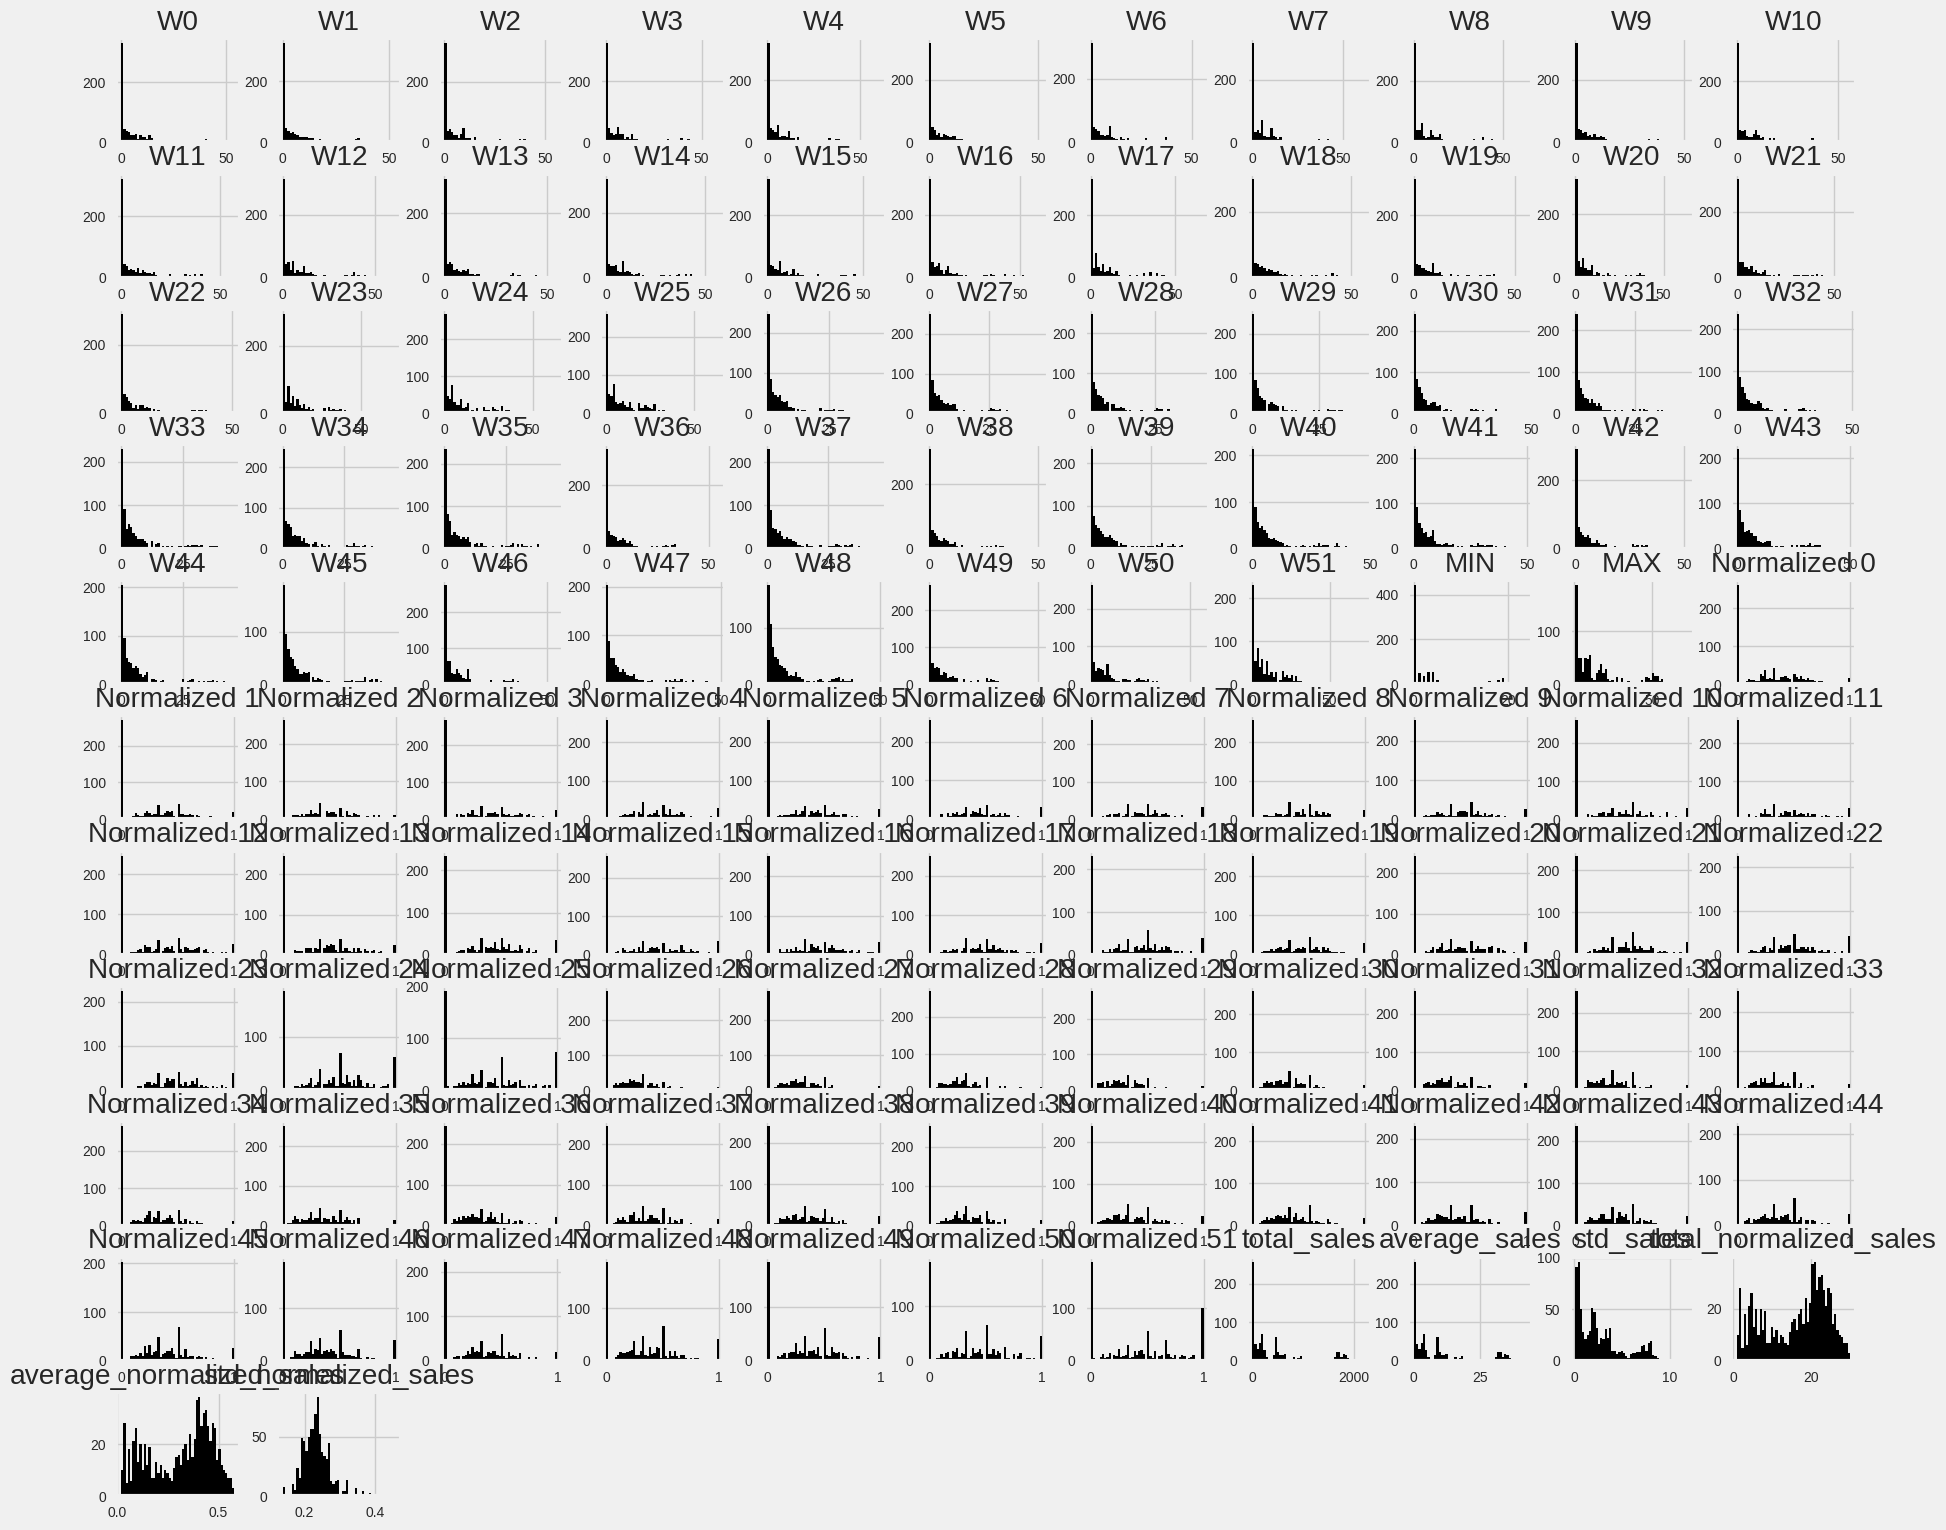

In [ ]:
df.hist(bins=50, figsize=(20,18), color='black')

In [ ]:
def outlier(df):
  columns = df.select_dtypes(include=['int', 'float']).columns
  outlier_counts = {}
  outlier_percentages = {}
  total_data_count = len(df)

  for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[x] < lower_bound) | (df[x] > upper_bound)]

    #menghitung jml outlier
    outlier_count = len(outliers)
    outlier_counts[x] = outlier_count

    #menghitung presentasi outlier
    if total_data_count > 0:
      outlier_percentage = (outlier_count / total_data_count) * 100
    else:
      outlier_percentage = 0
    outlier_percentages[x] = outlier_percentage

  #membuat dafataframe dari hasil perhitungan outlier
  outlier_df = pd.DataFrame({'Jumlah Outlier': outlier_counts, 'Persentase Outlier': outlier_percentages})

  #mengurutkan dataframe
  outlier_df = outlier_df.sort_values (by='Persentase Outlier', ascending=False)

  return outlier_df

outlier_df = outlier(data)
outlier_df

,Jumlah Outlier,Persentase Outlier
MIN,124,15.289766
W28,109,13.440197
W42,106,13.070284
W46,104,12.823674
W40,102,12.577065
...,...,...
Normalized 19,0,0.000000
Normalized 21,0,0.000000
Normalized 22,0,0.000000
Normalized 23,0,0.000000


In [ ]:
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, MIN to Normalized 51
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jumlah Outlier      106 non-null    int64  
 1   Persentase Outlier  106 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.5+ KB


PRE-PROCESSING

In [ ]:
df = df.iloc[:, 55:]

In [ ]:
df

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 48,Normalized 49,Normalized 50,Normalized 51,total_sales,average_sales,std_sales,total_normalized_sales,average_normalized_sales,std_normalized_sales
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.22,0.17,0.11,0.39,501,9.634615,3.694346,19.13,0.367885,0.205095
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.50,0.10,0.60,0.00,207,3.980769,2.363865,20.70,0.398077,0.236387
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,1.00,0.45,0.45,0.36,452,8.692308,2.920774,26.87,0.516731,0.267052
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.71,0.35,0.29,0.35,430,8.269231,3.565166,19.19,0.369038,0.209090
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.13,0.53,0.33,0.40,440,8.461538,3.238624,18.90,0.363462,0.216260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.00,0.00,0.33,0.00,0.00,0.67,0.33,0.00,0.00,0.33,...,0.00,0.00,0.67,0.00,23,0.442308,0.725271,7.64,0.146923,0.241722
807,0.00,0.14,0.00,0.00,0.14,0.29,0.29,0.86,0.00,0.14,...,0.71,0.71,0.86,0.71,142,2.730769,2.010905,20.29,0.390192,0.287201
808,0.25,0.00,0.00,0.00,0.25,0.25,0.50,0.25,0.25,0.00,...,0.00,0.00,1.00,0.75,26,0.500000,0.874475,6.50,0.125000,0.218619
809,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.50,0.00,...,0.00,0.00,1.00,0.00,17,0.326923,0.550264,8.50,0.163462,0.275132


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Memilih kolom untuk clustering
features = df.columns[df.columns.str.startswith('Normalized')]
X = df[features]

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=13)  # Menentukan jumlah komponen utama yang diinginkan
principal_components = pca.fit_transform(X_scaled)

# Membuat DataFrame baru dari hasil PCA
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(13)])

# Menampilkan DataFrame hasil PCA
print(df_pca)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.843758 -1.666305  1.079720  1.371362 -0.075359  0.373701 -0.364117   
1   -2.602865 -0.832822  0.506232  0.717106 -2.206948 -0.707631 -0.021705   
2   -5.460472  0.264289  0.585443 -0.833555 -0.549898  1.348246 -0.424807   
3   -1.680580 -0.676690  0.606300 -0.854259 -2.444594 -0.663709  0.445199   
4   -1.557067 -0.578725 -0.861498  1.041431  0.047854  0.566877  0.280365   
..        ...       ...       ...       ...       ...       ...       ...   
806  3.964914 -1.133255  0.450647  1.770664 -0.022125 -0.979244 -0.195659   
807 -1.235056  4.218412  3.200908 -0.587034 -1.148648 -1.825535  0.196104   
808  5.159059  0.455018 -0.211778 -0.077760 -0.366849 -0.138295  0.528811   
809  4.071102  1.072746 -0.251804  0.909203 -0.165583  0.362554  1.497795   
810  5.257055 -1.484604  0.307128  0.625463 -1.503338 -0.308271 -0.114100   

          PC8       PC9      PC10      PC11      PC12      PC13  
0   -0.59

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Menghitung inertia
inertia = kmeans.inertia_

# Menghitung silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 31357.59929342148
Silhouette Score: 0.23964434952031516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.7953949447990223
AgglomerativeClustering Silhouette Score: 0.8037174804395422
DBSCAN Silhouette Score: -0.37118286918880866

KMeans Clustering:
Labels: [1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 

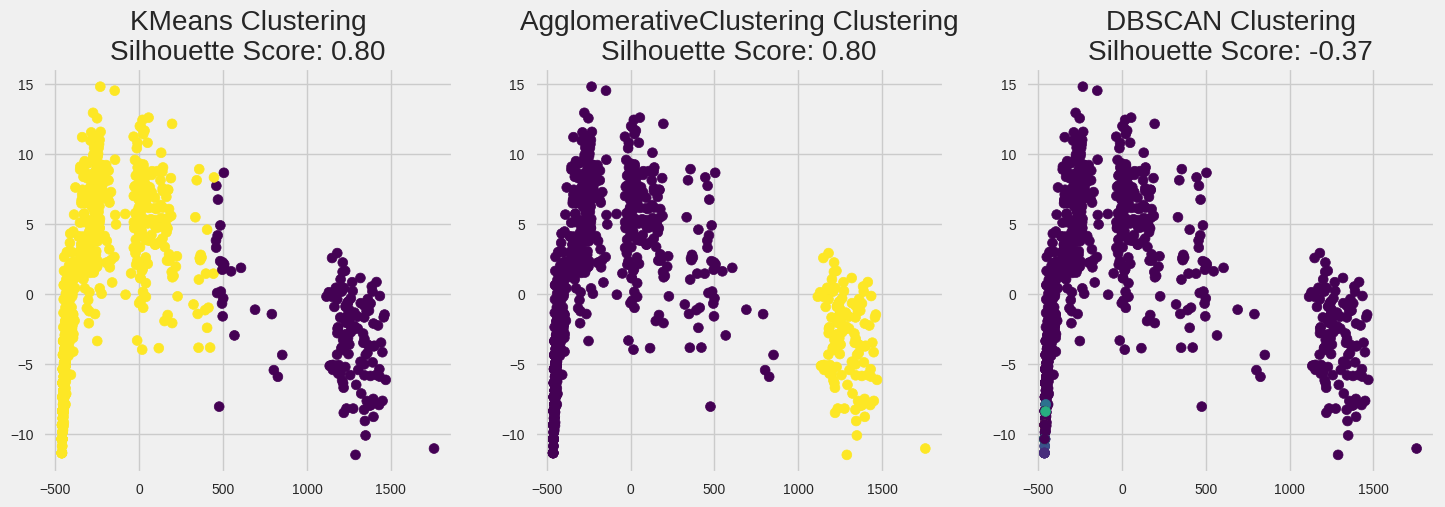

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
clustering_algorithms = {
    "KMeans": KMeans(n_clusters=2, random_state=42),
    "AgglomerativeClustering": AgglomerativeClustering(n_clusters=2),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=2)
}

# Dictionary to store clustering results
clustering_results = {}

# Perform clustering
for name, algorithm in clustering_algorithms.items():
    cluster_labels = algorithm.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    clustering_results[name] = {
        "labels": cluster_labels,
        "silhouette_score": silhouette_avg
    }
    print(f"{name} Silhouette Score: {silhouette_avg}")

# Display the results
for name, result in clustering_results.items():
    print(f"\n{name} Clustering:")
    print(f"Labels: {result['labels']}")
    print(f"Silhouette Score: {result['silhouette_score']}")

# Visualisasi clustering (jika memungkinkan)
# Misalnya menggunakan PCA untuk mengurangi dimensi menjadi 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)

plt.figure(figsize=(16, 5))
for i, (name, result) in enumerate(clustering_results.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=result["labels"], cmap="viridis", s=50)
    plt.title(f"{name} Clustering\nSilhouette Score: {result['silhouette_score']:.2f}")

plt.show()

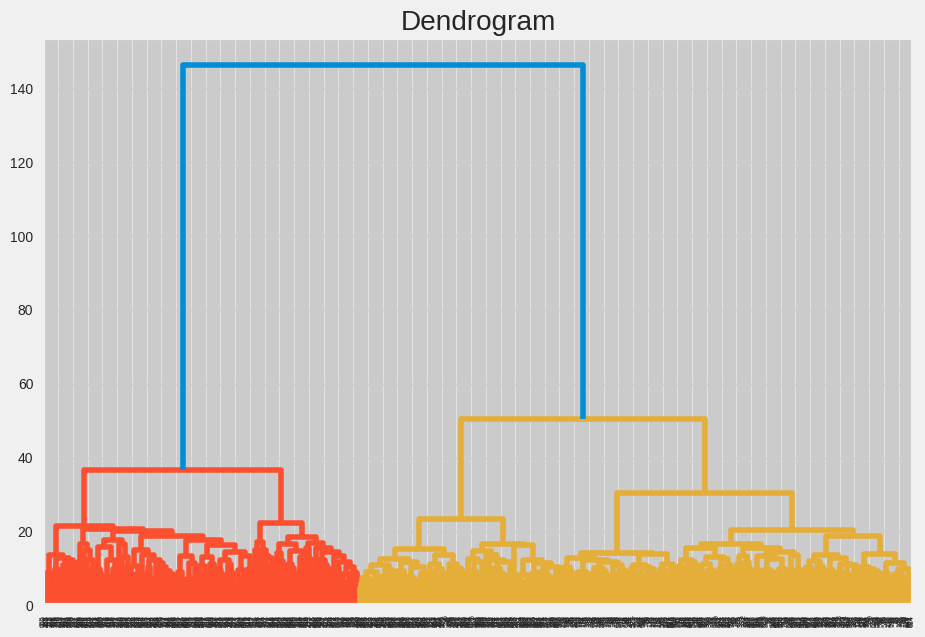

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Agglomerative Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Menghitung inertia
inertia = kmeans.inertia_

# Menghitung silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans_labels)

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')

Inertia: 31357.59929342148
Silhouette Score: 0.23964434952031516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

In [ ]:
# Centroid-based Clustering sudah ditunjukkan dalam K-Means
centroid_labels = kmeans_labels

In [ ]:
centroid_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Menyusun hasil clustering dalam DataFrame
df['Hierarchical_Labels'] = hierarchical_labels
df['KMeans_Labels'] = kmeans_labels
df['DBSCAN_Labels'] = dbscan_labels
# Menampilkan hanya bagian head dari hasil clustering
print(df[['Hierarchical_Labels', 'KMeans_Labels', 'DBSCAN_Labels']].head())

   Hierarchical_Labels  KMeans_Labels  DBSCAN_Labels
0                    0              1             -1
1                    0              1             -1
2                    0              1             -1
3                    0              1             -1
4                    0              1             -1


In [ ]:
# Melakukan clustering pada data yang telah dinormalisasi
X = df.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Menampilkan hasil clustering
print("Hierarchical Labels:")
print(hierarchical_labels)
print("\nKMeans Labels:")
print(kmeans_labels)
print("\nDBSCAN Labels:")
print(dbscan_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Hierarchical Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0